In [ ]:
import random
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Titanic-Dataset.csv')
df.head() #printing the first 5 rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe() # printing the statistical values of the dataset

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.loc[df['Age'].isnull(),'Age'] = np.round(df['Age'].mean()) # replacing the null values with mean of the row as there are not any outliers
df.loc[df['Embarked'].isnull(),'Embarked'] = df['Embarked'].value_counts().index[0]

<AxesSubplot:>

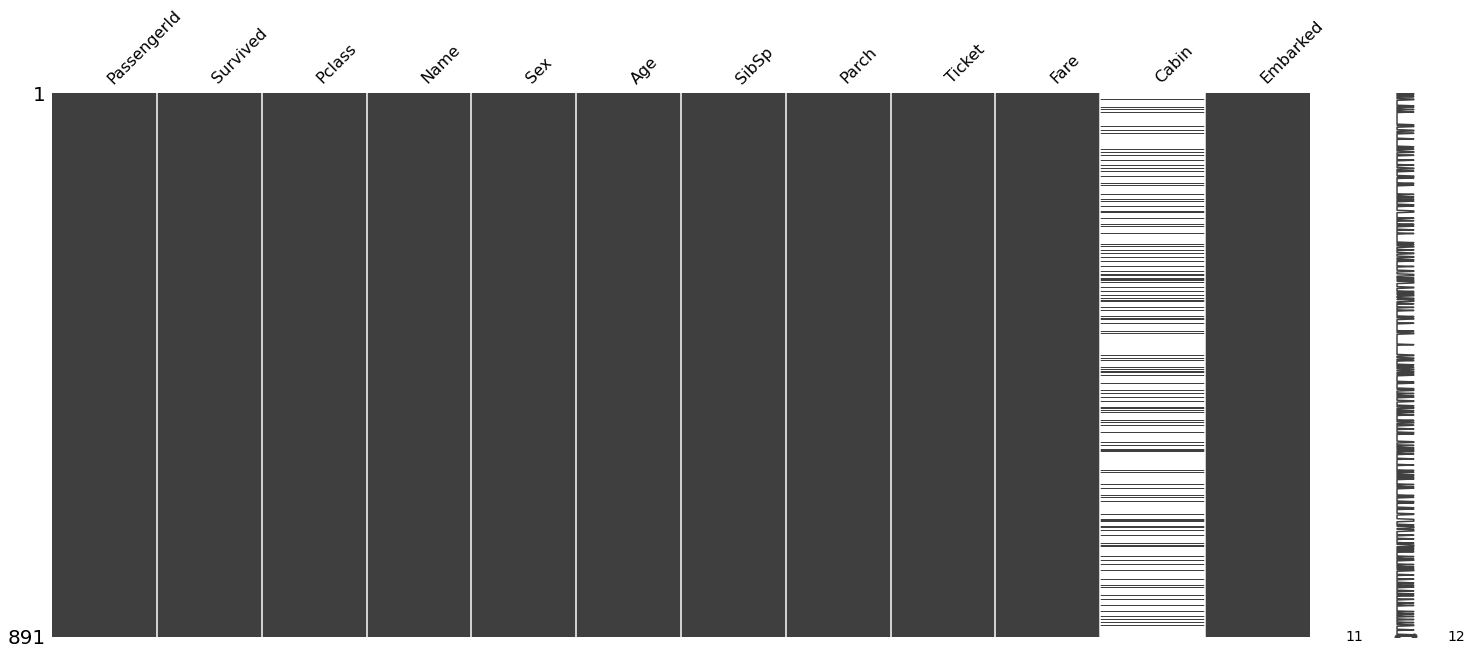

In [ ]:
import missingno as mns # Visualizing the null values
mns.matrix(df)

In [ ]:
import seaborn as sns

<AxesSubplot:xlabel='Survived', ylabel='count'>

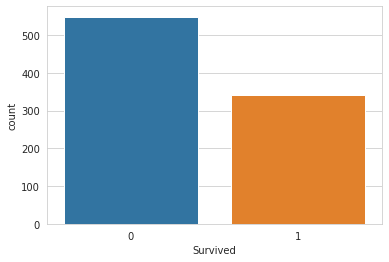

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df) # Graph to see how many people have survived the clash

<AxesSubplot:xlabel='Survived', ylabel='count'>

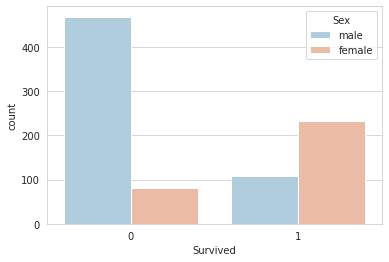

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r') # Graph to visualize how many male & female have survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

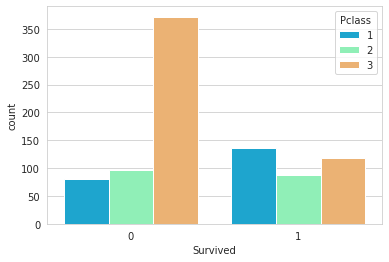

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')# Graph to visualize which class people have survived

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

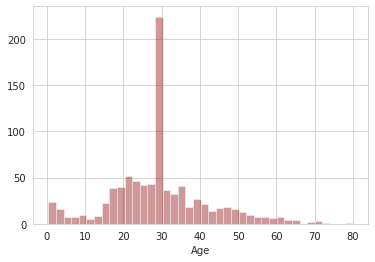

In [ ]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=40)# Graph to visualize what age group people are onboard

<AxesSubplot:>

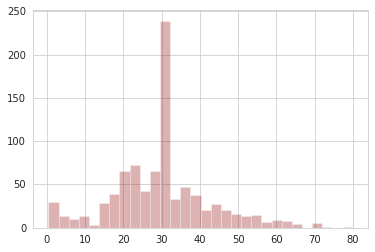

In [ ]:

df['Age'].hist(bins=30,color='darkred',alpha=0.3) # Just changing the size of bins

<AxesSubplot:xlabel='SibSp', ylabel='count'>

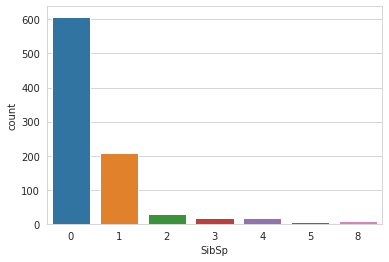

In [ ]:
sns.countplot(x='SibSp',data=df) # Graph to see how many passengers have siblings

<AxesSubplot:>

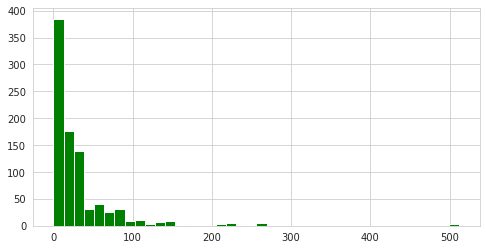

In [ ]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4)) # Graph to visualize how much fare was paid 

In [ ]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

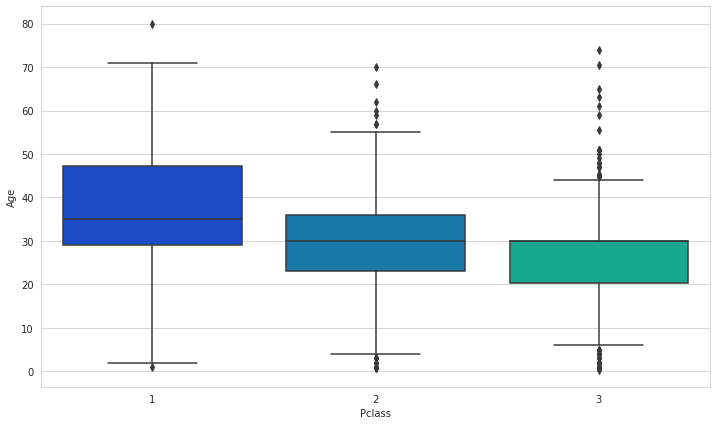

In [ ]:

plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter') # Using box-plot to check what age group people are present in which class

In [ ]:
# using module to replace age in plclass 
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [ ]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)# calling the above function for replace

<AxesSubplot:>

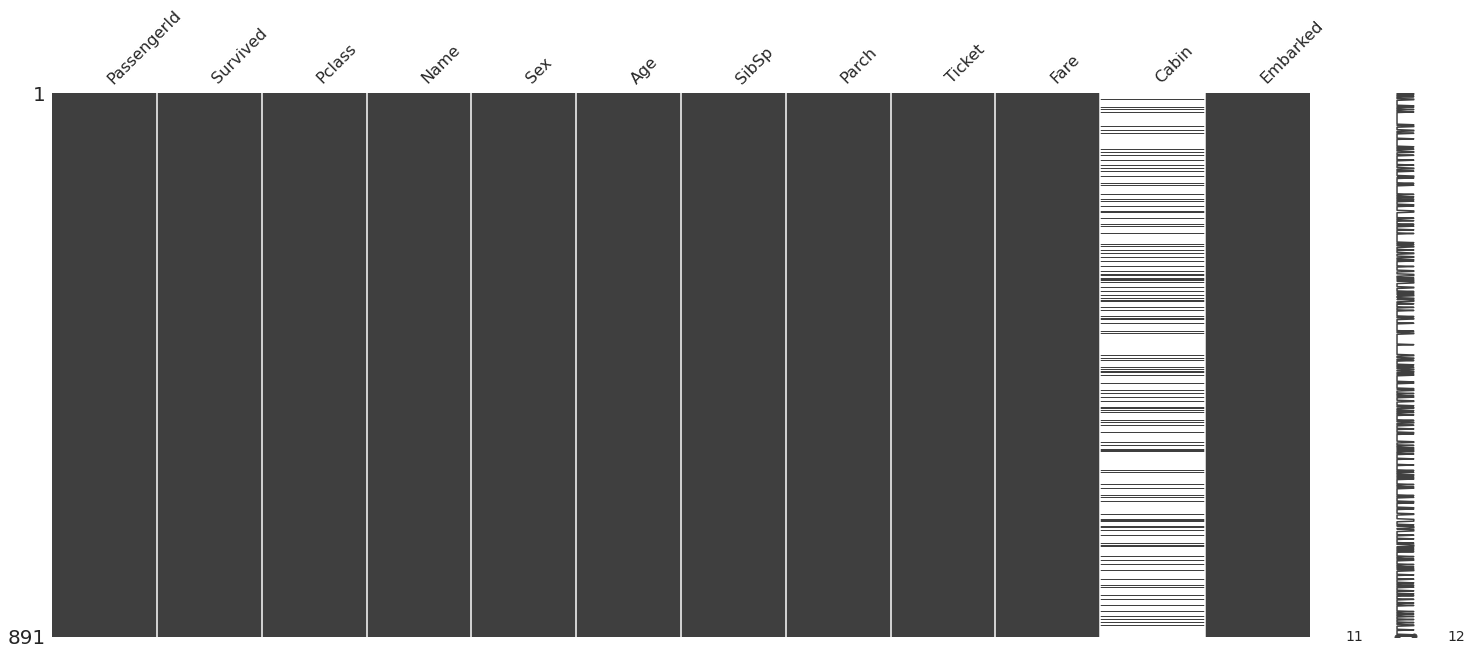

In [ ]:
mns.matrix(df) 

In [ ]:
# Dropping the cabin column

df.drop('Cabin',axis=1,inplace=True)

In [ ]:

df.head() # After droping 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

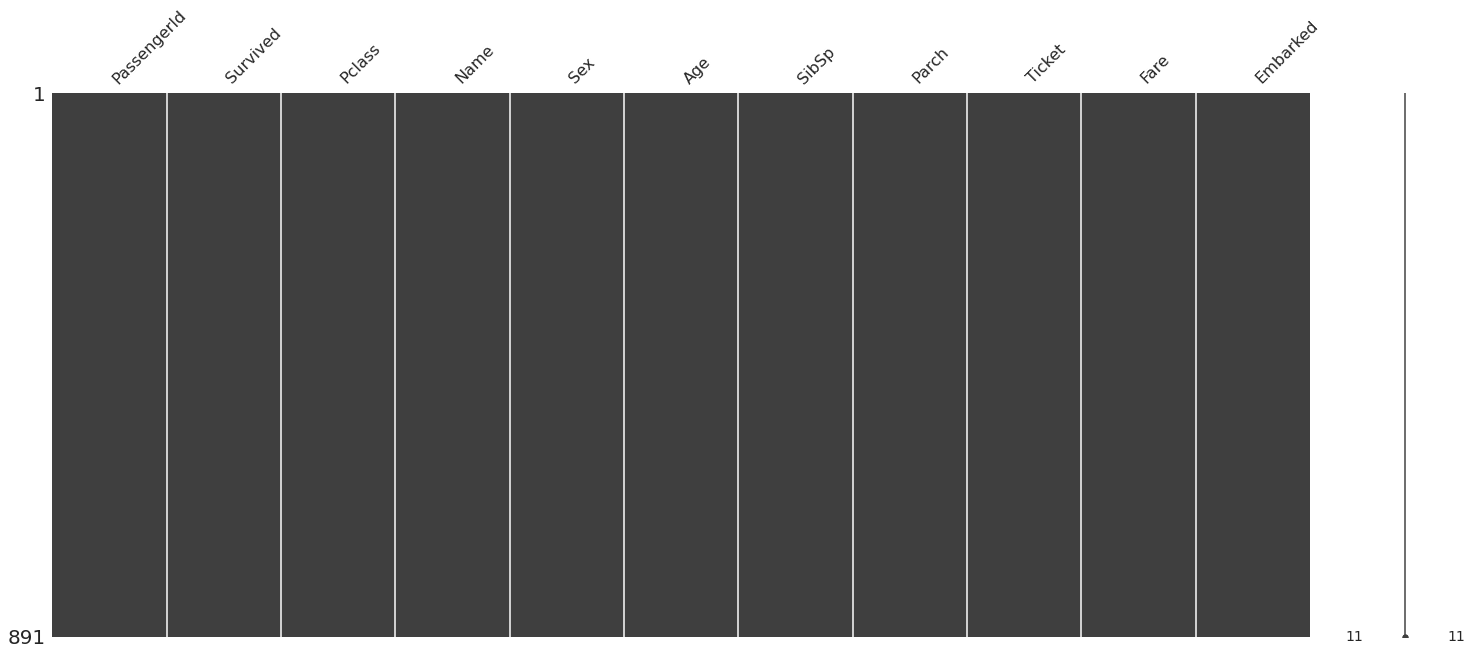

In [ ]:
mns.matrix(df)

In [ ]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True) # Converting categorical into numerical using get_dummies


In [ ]:
# Extracting the features & manually splitting the dataset & selecting survived as our target variable
features = ['Pclass','Sex','Age','SibSp','Parch', 'Fare', 'Embarked']
nb_train = int(np.floor(0.9 * len(df)))
df = df.sample(frac=1, random_state=42)
X_train = df[features][:nb_train]
y_train = df['Survived'][:nb_train].values
X_test = df[features][nb_train:]
y_test = df['Survived'][nb_train:].values

In [ ]:
def entropy(p): # Defining a function for calculating the entropy
    if p == 0:
        return 0
    elif p == 1:
        return 0
    else:
        return - (p * np.log2(p) + (1 - p) * np.log2(1-p))

def information_gain(left_child, right_child): # defining a function to calculate information gain of the decision tree
    parent = left_child + right_child
    p_parent = parent.count(1) / len(parent) if len(parent) > 0 else 0
    p_left = left_child.count(1) / len(left_child) if len(left_child) > 0 else 0
    p_right = right_child.count(1) / len(right_child) if len(right_child) > 0 else 0
    IG_p = entropy(p_parent)
    IG_l = entropy(p_left)
    IG_r = entropy(p_right)
    return IG_p - len(left_child) / len(parent) * IG_l - len(right_child) / len(parent) * IG_r

In [ ]:
def draw_bootstrap(X_train, y_train): # Function for calculating the bootstrap for drawing the branches
    bootstrap_indices = list(np.random.choice(range(len(X_train)), len(X_train), replace = True))
    oob_indices = [i for i in range(len(X_train)) if i not in bootstrap_indices]
    X_bootstrap = X_train.iloc[bootstrap_indices].values
    y_bootstrap = y_train[bootstrap_indices]
    X_oob = X_train.iloc[oob_indices].values
    y_oob = y_train[oob_indices]
    return X_bootstrap, y_bootstrap, X_oob, y_oob

def oob_score(tree, X_test, y_test): # Function for checking the out of block(test dataset) & determine the score
    mis_label = 0
    for i in range(len(X_test)):
        pred = predict_tree(tree, X_test[i])
        if pred != y_test[i]:
            mis_label += 1
    return mis_label / len(X_test)

In [ ]:
def find_split_point(X_bootstrap, y_bootstrap, max_features):# Function for caclculating the number of split
    feature_ls = list()
    num_features = len(X_bootstrap[0])

    while len(feature_ls) <= max_features:
      feature_idx = random.sample(range(num_features), 1)
      if feature_idx not in feature_ls:
        feature_ls.extend(feature_idx)

    best_info_gain = -999
    node = None
    for feature_idx in feature_ls:
      for split_point in X_bootstrap[:,feature_idx]:
        left_child = {'X_bootstrap': [], 'y_bootstrap': []}
        right_child = {'X_bootstrap': [], 'y_bootstrap': []}

        # split children for continuous variables
        if type(split_point) in [int, float]:
            for i, value in enumerate(X_bootstrap[:,feature_idx]):
                if value <= split_point:
                    left_child['X_bootstrap'].append(X_bootstrap[i])
                    left_child['y_bootstrap'].append(y_bootstrap[i])
                else:
                    right_child['X_bootstrap'].append(X_bootstrap[i])
                    right_child['y_bootstrap'].append(y_bootstrap[i])
        # split children for categoric variables
        else:
            for i, value in enumerate(X_bootstrap[:,feature_idx]):
                if value == split_point:
                    left_child['X_bootstrap'].append(X_bootstrap[i])
                    left_child['y_bootstrap'].append(y_bootstrap[i])
                else:
                    right_child['X_bootstrap'].append(X_bootstrap[i])
                    right_child['y_bootstrap'].append(y_bootstrap[i])

        split_info_gain = information_gain(left_child['y_bootstrap'], right_child['y_bootstrap'])
        if split_info_gain > best_info_gain:
            best_info_gain = split_info_gain
            left_child['X_bootstrap'] = np.array(left_child['X_bootstrap'])
            right_child['X_bootstrap'] = np.array(right_child['X_bootstrap'])
            node = {'information_gain': split_info_gain,
                    'left_child': left_child,
                    'right_child': right_child,
                    'split_point': split_point,
                    'feature_idx': feature_idx}


    return node

In [ ]:
def terminal_node(node):# Function for the terminal node of the decision tree
    y_bootstrap = node['y_bootstrap']
    pred = max(y_bootstrap, key = y_bootstrap.count)
    return pred


def split_node(node, max_features, min_samples_split, max_depth, depth):# function for including all the hyperparameters
    left_child = node['left_child']
    right_child = node['right_child']

    del(node['left_child'])
    del(node['right_child'])

    if len(left_child['y_bootstrap']) == 0 or len(right_child['y_bootstrap']) == 0:
        empty_child = {'y_bootstrap': left_child['y_bootstrap'] + right_child['y_bootstrap']}
        node['left_split'] = terminal_node(empty_child)
        node['right_split'] = terminal_node(empty_child)
        return

    if depth >= max_depth:
        node['left_split'] = terminal_node(left_child)
        node['right_split'] = terminal_node(right_child)
        return node

    if len(left_child['X_bootstrap']) <= min_samples_split:
        node['left_split'] = node['right_split'] = terminal_node(left_child)
    else:
        node['left_split'] = find_split_point(left_child['X_bootstrap'], left_child['y_bootstrap'], max_features)
        split_node(node['left_split'], max_depth, min_samples_split, max_depth, depth + 1)
    if len(right_child['X_bootstrap']) <= min_samples_split:
        node['right_split'] = node['left_split'] = terminal_node(right_child)
    else:
        node['right_split'] = find_split_point(right_child['X_bootstrap'], right_child['y_bootstrap'], max_features)
        split_node(node['right_split'], max_features, min_samples_split, max_depth, depth + 1)

In [ ]:
def build_tree(X_bootstrap, y_bootstrap, max_depth, min_samples_split, max_features):# Function for building of the tree
    root_node = find_split_point(X_bootstrap, y_bootstrap, max_features)
    split_node(root_node, max_features, min_samples_split, max_depth, 1)
    return root_node

def random_forest(X_train, y_train, n_estimators, max_features, max_depth, min_samples_split):# Function to use Random Forest Regressor
    tree_ls = list()
    oob_ls = list()
    for i in range(n_estimators):
        X_bootstrap, y_bootstrap, X_oob, y_oob = draw_bootstrap(X_train, y_train)
        tree = build_tree(X_bootstrap, y_bootstrap, max_features, max_depth, min_samples_split)
        tree_ls.append(tree)
        oob_error = oob_score(tree, X_oob, y_oob)
        oob_ls.append(oob_error)
    print("OOB estimate: {:.2f}".format(np.mean(oob_ls)))
    return tree_ls

In [ ]:
def predict_tree(tree, X_test):# Function for predictions of trees
    feature_idx = tree['feature_idx']

    if X_test[feature_idx] <= tree['split_point']:
        if type(tree['left_split']) == dict:
            return predict_tree(tree['left_split'], X_test)
        else:
            value = tree['left_split']
            return value
    else:
        if type(tree['right_split']) == dict:
            return predict_tree(tree['right_split'], X_test)
        else:
            return tree['right_split']

In [ ]:
def predict_rf(tree_ls, X_test):# function for prediction of random forest
    pred_ls = list()
    for i in range(len(X_test)):
        ensemble_preds = [predict_tree(tree, X_test.values[i]) for tree in tree_ls]
        final_pred = max(ensemble_preds, key = ensemble_preds.count)
        pred_ls.append(final_pred)
    return np.array(pred_ls)
def grid_search(X, y, param_grid, cv=5):
    best_score = -np.inf
    best_params = None
    for params in param_grid:
        model = RandomForestRegressor(**params)
        scores = []
        for i in range(cv):
            n_samples = X.shape[0]
            idx = np.arange(n_samples)
            np.random.shuffle(idx)
            X_train = X[idx[:n_samples//2]]
            y_train = y[idx[:n_samples//2]]
            X_val = X[idx[n_samples//2:]]
            y_val = y[idx[n_samples//2:]]
            model.fit(X_train, y_train)
            score = model.score(X_val, y_val)
            scores.append(score)
        mean_score = np.mean(scores)
        if mean_score > best_score:
            best_score = mean_score
            best_params = params
    return best_params, best_score

In [ ]:
class RandomForestRegressor:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []

    def fit(self, X, y):
        n_samples, n_features = X.shape

        for i in range(self.n_estimators):
            tree = DecisionTreeRegressor(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split
            )
            idxs = np.random.choice(n_samples, size=n_samples, replace=True)
            X_sampled = X[idxs]
            y_sampled = y[idxs]
            tree.fit(X_sampled, y_sampled)
            self.trees.append(tree)

    def predict(self, X):
        y_preds = np.zeros(len(X))

        for tree in self.trees:
            y_preds += tree.predict(X)

        return y_preds / self.n_estimators

In [ ]:
def random_search(X, y, param_distributions, n_iter=10):
    best_params = None
    best_score = float('-inf')

    for i in range(n_iter):
        params = {
            param_name: random.choice(param_values)
            for param_name, param_values in param_distributions.items()
        }
        model = RandomForestRegressor(**params)
        model.fit(X, y)
        score = r2_score(y, model.predict(X))

        if score > best_score:
            best_score = score
            best_params = params

    return best_params, best_score

In [ ]:
# Manual Tuning of the hyperparameters
n_estimators = 100
max_features = 5
max_depth = 10
min_samples_split = 5

model = random_forest(X_train, y_train, n_estimators=100, max_features=5, max_depth=10, min_samples_split=5)

OOB estimate: 0.32


In [ ]:
# predicting the accuracy
preds = predict_rf(model, X_test)
acc = sum(preds == y_test) / len(y_test)
print("Testing accuracy: {}".format(np.round(acc,3)))

Testing accuracy: 0.822
